In [1]:
import torch
print(torch.backends.mps.is_available())

True


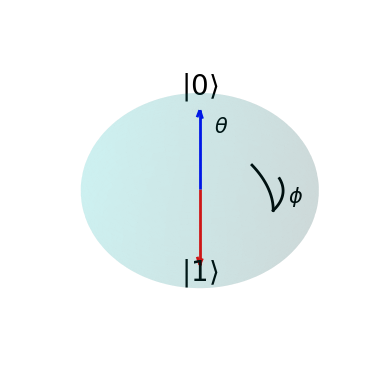

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Arc

# Funzione per aggiungere archi in 3D
def add_arc(ax, center, radius, start_angle, end_angle, color, axis='z', resolution=100):
    theta = np.linspace(np.radians(start_angle), np.radians(end_angle), resolution)
    
    if axis == 'z':
        x = radius * np.cos(theta) + center[0]
        y = radius * np.sin(theta) + center[1]
        z = np.full_like(x, center[2])
    elif axis == 'x':
        z = radius * np.cos(theta) + center[2]
        y = radius * np.sin(theta) + center[1]
        x = np.full_like(z, center[0])
    elif axis == 'y':
        x = radius * np.cos(theta) + center[0]
        z = radius * np.sin(theta) + center[2]
        y = np.full_like(x, center[1])
    
    ax.plot(x, y, z, color=color, lw=2)

# Crea una nuova figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Parametri della sfera
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Disegna la superficie della sfera con trasparenza
ax.plot_surface(x, y, z, color='c', alpha=0.1)

# Etichette degli stati base
ax.text(0, 0, 1.2, r'$|0\rangle$', fontsize=20, ha='center')
ax.text(0, 0, -1.2, r'$|1\rangle$', fontsize=20, ha='center')

# Vettori per |0> e |1>
ax.quiver(0, 0, 0, 0, 0, 1, color='b', arrow_length_ratio=0.1, linewidth=2)
ax.quiver(0, 0, 0, 0, 0, -1, color='r', arrow_length_ratio=0.1, linewidth=2)

# Arco per angolo theta (tra |0> e un punto sulla sfera)
add_arc(ax, [0, 0, 0], 0.7, 0, 45, 'k', axis='y')  # theta = 45°

# Arco per angolo phi (proiezione sull'equatore XY)
add_arc(ax, [0, 0, 0], 0.7, 0, 45, 'k', axis='z')  # phi = 45°

# Etichette per gli angoli theta e phi
ax.text(0.8, 0.2, 0, r'$\phi$', fontsize=15, ha='center')
ax.text(0.2, 0, 0.8, r'$\theta$', fontsize=15, ha='center')

# Limiti degli assi
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Rimuovi la griglia e le etichette degli assi
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Nascondi gli assi
ax.set_axis_off()

# Visualizza il grafico
plt.show()

fig.savefig("bloch.png", dpi = 500)


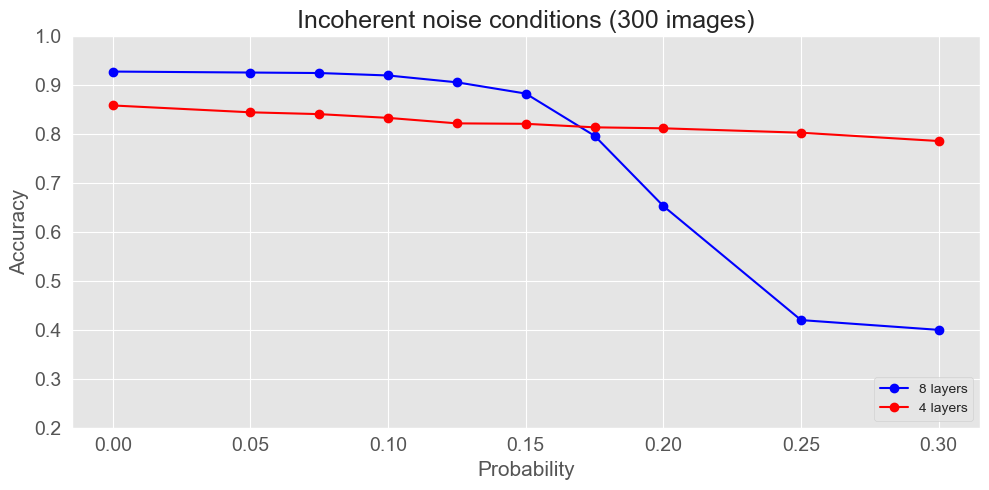

In [2]:
import matplotlib.pyplot as plt

# Dati
accuracy_inc = [0.9280, 0.926, 0.925,0.92, 0.906, 0.883, 0.7967, 0.653, 0.4200, 0.40]
accuracy_4 = [0.8587, 0.8447, 0.841, 0.8333, 0.8221, 0.8212, 0.814, 0.812, 0.803, 0.786]
class_p = [0, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3]

# Creazione grafico
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))

# Titoli e etichette
ax.set_title('Incoherent noise conditions (300 images)', fontsize=18)
ax.set_xlabel('Probability', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_ylim(0.2, 1)

ax.tick_params(axis='both', which='major', labelsize=14)
# Tracciare i punti collegati
ax.plot(class_p, accuracy_inc, marker='o', color='b', label='8 layers')
ax.plot(class_p, accuracy_4, marker='o', color='r', label='4 layers')

# Legenda
ax.legend(loc='lower right')

# Griglia e layout
ax.grid(True)
plt.tight_layout()

# Visualizzazione grafico
plt.show()
fig.savefig('/Users/jackvittori/Desktop/plots/inco300.png', dpi=300)

In [35]:
import pickle
with open("/Users/jackvittori/Desktop/DEPOLARIZING/tutte/nonoise.pickle", "rb") as file:
    res_0 = pickle.load(file)

In [36]:
res_0['table']

,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.26,0.860258,3707,0.861074,0.859989,7,0.428571,14912
1,0.28,0.869682,3542,0.883117,0.859989,172,0.593023,16232
2,0.30,0.887722,3077,0.927202,0.859989,637,0.697017,19952
3,0.32,0.891761,2535,0.964497,0.859989,1179,0.735369,24288
4,0.34,0.892030,2056,0.980058,0.859989,1658,0.782871,28120
5,0.36,0.892030,1608,0.989428,0.859989,2106,0.817664,31704


In [37]:
with open("/Users/jackvittori/Desktop/DEPOLARIZING/tutte/mcm0-015.pickle", "rb") as file:
    res_1 = pickle.load(file)

In [38]:
res_1['table']

,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.26,0.865913,3680,0.868207,0.865105,34,0.617647,15128
1,0.28,0.891492,3142,0.919796,0.865105,572,0.736014,19432
2,0.30,0.896607,2299,0.968247,0.865105,1415,0.780212,26176
3,0.32,0.893915,1599,0.989368,0.865105,2115,0.821749,31776
4,0.34,0.893107,1016,0.996063,0.865105,2698,0.854337,36440
5,0.36,0.892838,654,1.000000,0.865105,3060,0.869935,39336


In [39]:
with open("/Users/jackvittori/Desktop/DEPOLARIZING/tutte/noise12alto.pickle", "rb") as file:
    res_2 = pickle.load(file)

In [40]:
res_2['table']

,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.2505,0.803177,3552,0.821509,0.800485,162,0.401235,16152
1,0.2510,0.806408,3030,0.877228,0.800485,684,0.492690,20328
2,0.2515,0.798869,2460,0.926016,0.800485,1254,0.549442,24888
3,0.2520,0.783791,2042,0.952008,0.800485,1672,0.578349,28232
4,0.2525,0.766290,1648,0.973908,0.800485,2066,0.600678,31384
5,0.2530,0.751481,1296,0.983025,0.800485,2418,0.627378,34200
6,0.2535,0.743403,983,0.993896,0.800485,2731,0.653241,36704


In [41]:
import matplotlib.pyplot as plt

In [42]:
"""accuarcy_dep = [0.9230, 0.8957, 0.8583, 0.7492, 0.5314, 0.4097, 0.3312, 0.2730]
class_p = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
accuracy_4 = [0.8612, 0.8485, 0.8211, 0.7857, 0.7412, 0.7035, 0.6481, 0.5601]"""

'accuarcy_dep = [0.9230, 0.8957, 0.8583, 0.7492, 0.5314, 0.4097, 0.3312, 0.2730]\nclass_p = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]\naccuracy_4 = [0.8612, 0.8485, 0.8211, 0.7857, 0.7412, 0.7035, 0.6481, 0.5601]'

In [51]:
total_accuracy_2

0    0.803177
1    0.806408
2    0.798869
3    0.783791
4    0.766290
5    0.751481
6    0.743403
Name: Total Accuracy, dtype: float64

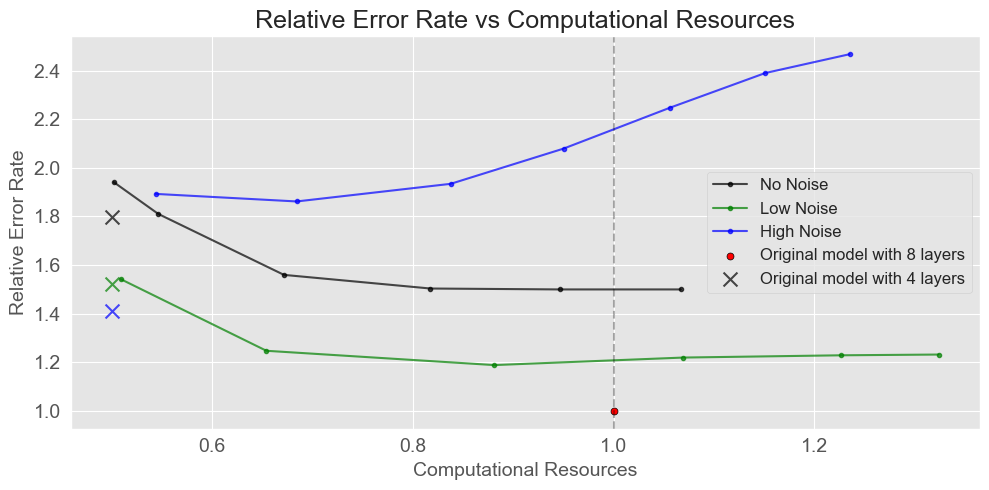

In [48]:
total_accuracy_0 = res_0['table']['Total Accuracy']
error_rate_0 = [(1-x)/(1-0.9280) for x in total_accuracy_0]
computational_resource_0 = [x/(3714*8) for x in res_0['table']['Executed layers']]

total_accuracy_1 = res_1['table']['Total Accuracy']
error_rate_1 = [(1-x)/(1-0.9130) for x in total_accuracy_1]
computational_resource_1 = [x/(3714*8) for x in res_1['table']['Executed layers']]

total_accuracy_2 = res_2['table']['Total Accuracy']
error_rate_2 = [(1-x)/(1-0.896) for x in total_accuracy_2]
computational_resource_2 = [x/(3714*8) for x in res_2['table']['Executed layers']]

plt.style.use('ggplot') 
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(computational_resource_0, error_rate_0, marker='.', color='black', alpha=0.7, label='No Noise')
ax.plot(computational_resource_1, error_rate_1, marker='.', color='green', alpha=0.7, label='Low Noise')
ax.plot(computational_resource_2, error_rate_2, marker='.', color='blue', alpha=0.7, label='High Noise')

ax.scatter(1, 1,  marker='.', color='red', edgecolors= 'black', s=100, label='Original model with 8 layers') 
ax.axvline(x = 1, color = 'black', alpha = 0.3, linestyle = '--')

ax.scatter(0.5, (1-0.8707)/(1-0.9280),  marker='x', color='black', alpha=0.7,  s=100, label='Original model with 4 layers')
ax.scatter(0.5, (1-0.8685)/(1-0.9137),  marker='x', color='green', alpha=0.7,  s=100)
ax.scatter(0.5, (1-0.8532)/(1-0.896),  marker='x', color='blue', alpha=0.7,  s=100)

# Titolo e label degli assi con fontsize più grande
ax.set_title('Relative Error Rate vs Computational Resources', fontsize=18)
ax.set_xlabel('Computational Resources', fontsize=14)
ax.set_ylabel('Relative Error Rate', fontsize=14)

# Aumentare la dimensione dei font dei tick sugli assi
ax.tick_params(axis='both', which='major', labelsize=14)

# Leggenda
ax.legend(loc='center right', fontsize=12)


ax.grid(True)
plt.tight_layout()

plt.savefig(f'/Users/jackvittori/Desktop/plots/provatutte.png', dpi=300)
plt.show()

In [49]:
computational_resource_1

[0.5091545503500269,
 0.6540118470651589,
 0.88099084544965,
 1.0694668820678515,
 1.2264404954227248,
 1.3239095315024232]

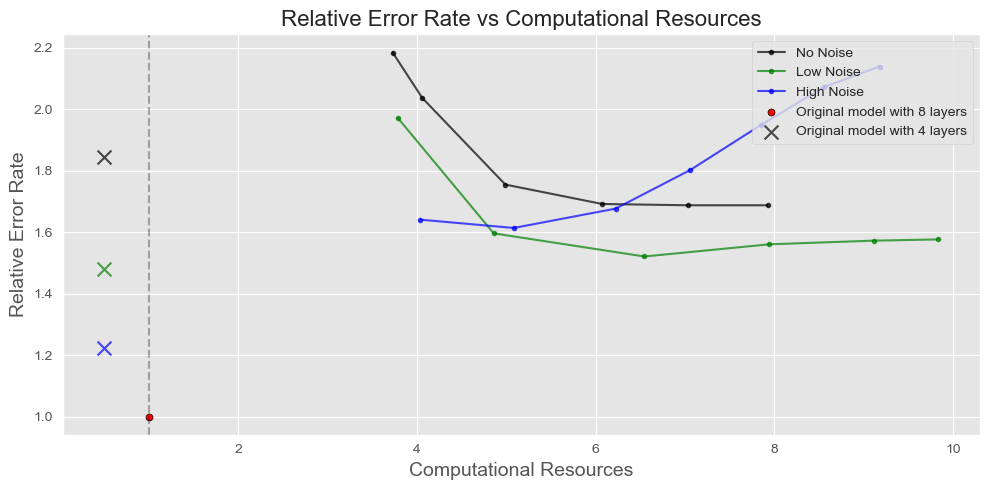

In [30]:
total_accuracy_0 = res_0['table']['Total Accuracy']
error_rate_0 = [(1-x)/(1-0.936) for x in total_accuracy_0]
computational_resource_0 = [x/(500*8) for x in res_0['table']['Executed layers']]

total_accuracy_1 = res_1['table']['Total Accuracy']
error_rate_1 = [(1-x)/(1-0.932) for x in total_accuracy_1]
computational_resource_1 = [x/(500*8) for x in res_1['table']['Executed layers']]

total_accuracy_2 = res_2['table']['Total Accuracy']
error_rate_2 = [(1-x)/(1-0.88) for x in total_accuracy_2]
computational_resource_2 = [x/(500*8) for x in res_2['table']['Executed layers']]

plt.style.use('ggplot') 
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(computational_resource_0, error_rate_0, marker='.', color='black', alpha=0.7, label='No Noise')
ax.plot(computational_resource_1, error_rate_1, marker='.', color='green', alpha=0.7, label='Low Noise')
ax.plot(computational_resource_2, error_rate_2, marker='.', color='blue', alpha=0.7, label='High Noise')

ax.scatter(1, 1,  marker='.', color='red', edgecolors= 'black', s=100, label='Original model with 8 layers') 
ax.axvline(x = 1, color = 'black', alpha = 0.3, linestyle = '--')

ax.scatter(0.5, (1-0.882)/(1-0.936),  marker='x', color='black', alpha=0.7,  s=100, label='Original model with 4 layers')
ax.scatter(0.5, (1-0.852)/(1-0.9),  marker='x', color='green', alpha=0.7,  s=100)
ax.scatter(0.5, (1-0.846)/(1-0.874),  marker='x', color='blue', alpha=0.7,  s=100)

ax.set_title('Relative Error Rate vs Computational Resources', fontsize=16)
ax.set_xlabel('Computational Resources', fontsize=14)
ax.set_ylabel('Relative Error Rate', fontsize=14)

ax.legend(loc='upper right')

ax.grid(True)
plt.tight_layout()

plt.savefig(f'/Users/jackvittori/Desktop/plots/depoplotclassical.png', dpi=300)
plt.show()

In [2]:
import pickle
with open("/Users/jackvittori/Desktop/DEPOLARIZING/tutte/mcm0-015.pickle", "rb") as file:
    rumore_alto = pickle.load(file)
    
rumore_alto['table']

,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.26,0.865913,3680,0.868207,0.865105,34,0.617647,15128
1,0.28,0.891492,3142,0.919796,0.865105,572,0.736014,19432
2,0.30,0.896607,2299,0.968247,0.865105,1415,0.780212,26176
3,0.32,0.893915,1599,0.989368,0.865105,2115,0.821749,31776
4,0.34,0.893107,1016,0.996063,0.865105,2698,0.854337,36440
5,0.36,0.892838,654,1.000000,0.865105,3060,0.869935,39336


In [1]:
import pickle
with open("/Users/jackvittori/Desktop/DEPOLARIZING/500immagini/mcm12.pickle", "rb") as file:
    ab = pickle.load(file)

In [2]:
ab['table']

,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.26,0.764,0,0,0.808,500,0.764,6000
1,0.28,0.764,0,0,0.808,500,0.764,6000
2,0.30,0.764,0,0,0.808,500,0.764,6000
3,0.32,0.764,0,0,0.808,500,0.764,6000
4,0.34,0.764,0,0,0.808,500,0.764,6000
5,0.36,0.764,0,0,0.808,500,0.764,6000
